In [1]:
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'xx-large' # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = 'xx-large'
matplotlib.rcParams['ytick.labelsize'] = 'xx-large'

In [3]:
# Read data into dataframe
with open('ablation_study_phys_seed_10.json', 'r') as file:
    d = json.load(file)
    keys = list(d.keys())
    vals = list(d.values())
    sorted_inds = np.argsort(vals)
    
    # Sort according to first seed
    d_sorted = {k:v for (k,v) in zip(np.array(keys)[sorted_inds], np.array(vals)[sorted_inds])}
    df = pd.DataFrame(d_sorted, index=[0])
    
for seed in 10*np.arange(2, 11):
    with open('ablation_study_phys_seed_%d.json'%seed, 'r') as file:
        df = df.append(json.load(file), ignore_index=True)
        
# Read data into dataframe [ERA5]
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/evaluate_schemes/on_era5/results/ablation_study/ablation_study_phys_seed_10.json', 'r') as file:
    d = json.load(file)
    keys = list(d.keys())
    vals = list(d.values())
    sorted_inds = np.argsort(vals)
    
    # Sort according to first seed
    d_sorted = {k:v for (k,v) in zip(np.array(keys)[sorted_inds], np.array(vals)[sorted_inds])}
    df_era5 = pd.DataFrame(d_sorted, index=[0])
    
for seed in 10*np.arange(2, 11):
    with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/evaluate_schemes/on_era5/results/ablation_study/ablation_study_phys_seed_%d.json'%seed, 'r') as file:
        df_era5 = df_era5.append(json.load(file), ignore_index=True)

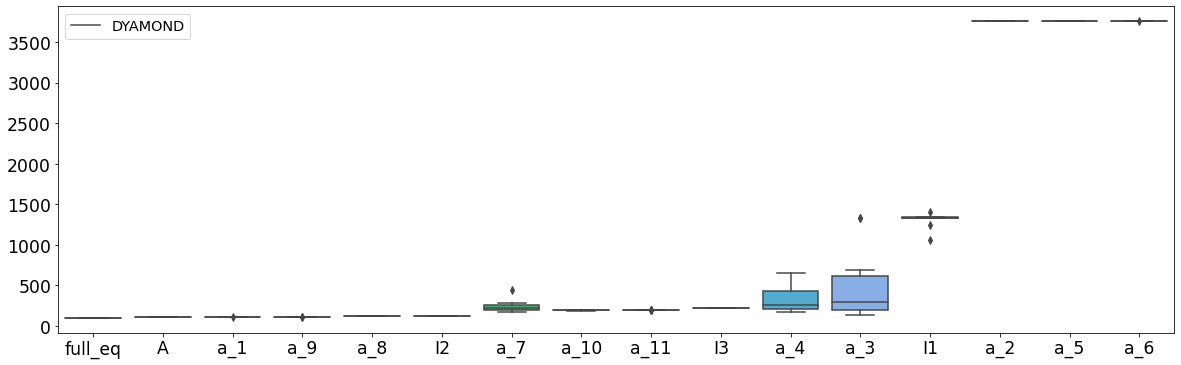

In [4]:
# Setting up the figure
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Ablation Study']

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(1,1,i+1)
    axis = axes[:i] + axes[(i+1):]
    
    YMAX = 600
                
    # plt.title(title_name)
    
    sns.boxplot(data=df)
    plt.legend(['DYAMOND'])

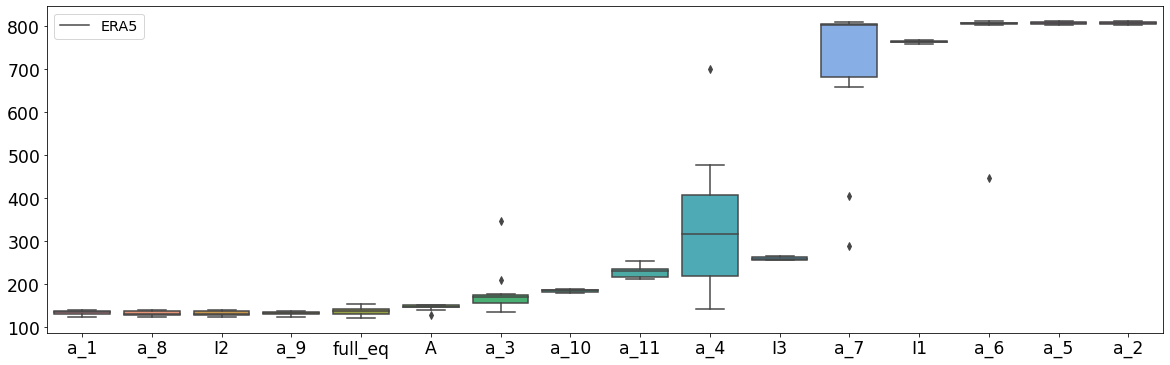

In [5]:
# Setting up the figure
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Ablation Study']

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(1,1,i+1)
    axis = axes[:i] + axes[(i+1):]
    
    YMAX = 600
                
    # plt.title(title_name)
    
    sns.boxplot(data=df_era5)
    plt.legend(['ERA5'])

**Using the normalized equation**

In [6]:
# Read data into dataframe
with open('ablation_study_seed_10.json', 'r') as file:
    d = json.load(file)
    keys = list(d.keys())
    vals = list(d.values())
    sorted_inds = np.argsort(vals)
    
    # Sort according to first seed
    d_sorted = {k:v for (k,v) in zip(np.array(keys)[sorted_inds], np.array(vals)[sorted_inds])}
    df_norm = pd.DataFrame(d_sorted, index=[0])
    
for seed in 10*np.arange(2, 11):
    with open('ablation_study_seed_%d.json'%seed, 'r') as file:
        df_norm = df_norm.append(json.load(file), ignore_index=True)
        
# Read data into dataframe [ERA5]
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/evaluate_schemes/on_era5/results/ablation_study/ablation_study_seed_10.json', 'r') as file:
    d = json.load(file)
    keys = list(d.keys())
    vals = list(d.values())
    sorted_inds = np.argsort(vals)
    
    # Sort according to first seed
    d_sorted = {k:v for (k,v) in zip(np.array(keys)[sorted_inds], np.array(vals)[sorted_inds])}
    df_norm_era5 = pd.DataFrame(d_sorted, index=[0])
    
for seed in 10*np.arange(2, 11):
    with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/evaluate_schemes/on_era5/results/ablation_study/ablation_study_seed_%d.json'%seed, 'r') as file:
        df_norm_era5 = df_norm_era5.append(json.load(file), ignore_index=True)

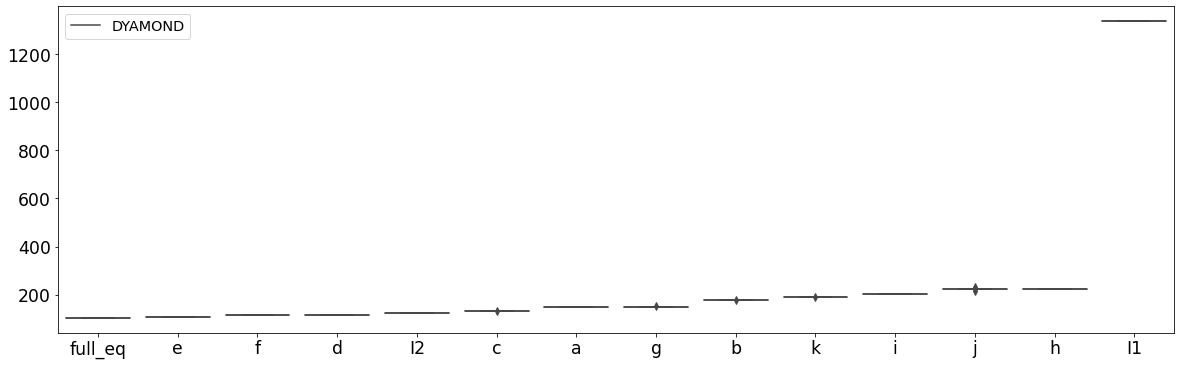

In [7]:
# Setting up the figure
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Ablation Study']

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(1,1,i+1)
    axis = axes[:i] + axes[(i+1):]
    
    YMAX = 600
                
    # plt.title(title_name)
    
    sns.boxplot(data=df_norm)
    plt.legend(['DYAMOND'])

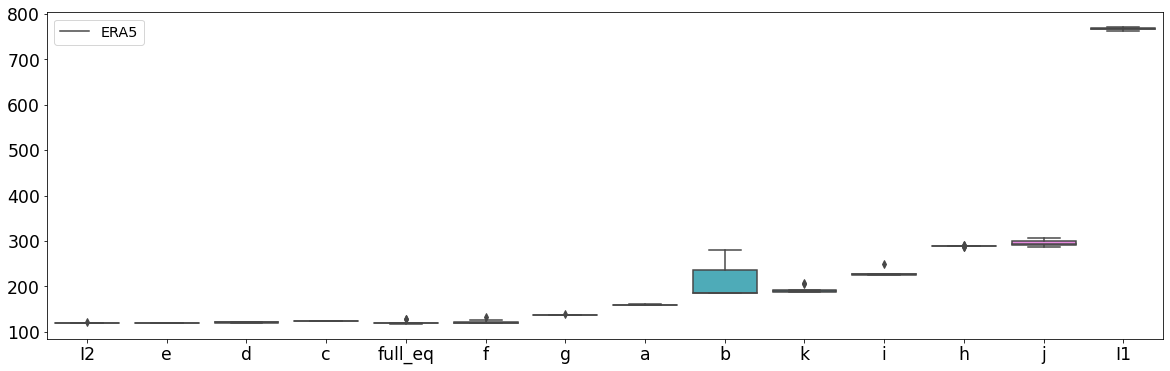

In [8]:
# Setting up the figure
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Ablation Study']

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(1,1,i+1)
    axis = axes[:i] + axes[(i+1):]
    
    YMAX = 600
                
    # plt.title(title_name)
    
    sns.boxplot(data=df_norm_era5)
    plt.legend(['ERA5'])

**Restraining using the normalized equation**

In [9]:
# Translate coefficients in the normalized form of the equation (a, ..., j) into coefficients (a_1, ..., a_{12}) of the physical form of the equation
translate = {'a': '~$a_5$', 'b': '$a_6$', 'c': '$a_1$, $a_2$, $a_3$, $a_4$', 'd': '$a_1$', 'e': '$A$', 'f': '$a_{9}$',
            'g': '~$a_7$', 'h': '$I_3 = 0$', 'i': '~$a_{11}$', 'j': '$\epsilon$', 'k': '~$a_{10}$', 'I1': 'I1', 'I2': 'I2', 'full_eq': 'full_eq'}

translate

{'a': '~$a_5$',
 'b': '$a_6$',
 'c': '$a_1$, $a_2$, $a_3$, $a_4$',
 'd': '$a_1$',
 'e': '$A$',
 'f': '$a_{9}$',
 'g': '~$a_7$',
 'h': '$I_3 = 0$',
 'i': '~$a_{11}$',
 'j': '$\\epsilon$',
 'k': '~$a_{10}$',
 'I1': 'I1',
 'I2': 'I2',
 'full_eq': 'full_eq'}

In [10]:
df_restrained = df

df_restrained['a_1'] = np.minimum(df_restrained['a_1'], np.minimum(df_norm['d'], df_norm['c']))
df_restrained['a_2'] = np.minimum(df_restrained['a_2'], df_norm['c'])
df_restrained['a_3'] = np.minimum(df_restrained['a_3'], df_norm['c'])
df_restrained['a_4'] = np.minimum(df_restrained['a_4'], df_norm['c'])
df_restrained['a_5'] = np.minimum(df_restrained['a_5'], df_norm['a']) ##
df_restrained['a_6'] = np.minimum(df_restrained['a_6'], df_norm['b'])
df_restrained['a_7'] = np.minimum(df_restrained['a_6'], df_norm['g']) ##
df_restrained['a_8'] = np.minimum(df_restrained['a_8'], df_norm['I2'])
df_restrained['a_9'] = np.minimum(df_restrained['a_9'], df_norm['f'])
df_restrained['a_10'] = np.minimum(df_restrained['a_10'], df_norm['k']) ##
df_restrained['a_11'] = np.minimum(df_restrained['a_11'], df_norm['i']) ##
df_restrained['A'] = np.minimum(df_restrained['A'], df_norm['e'])

df_restrained['I1'] = np.minimum(df_restrained['I1'], df_norm['I1'])
df_restrained['I2'] = np.minimum(df_restrained['I2'], df_norm['I2'])
df_restrained['I3'] = np.minimum(df_restrained['I3'], df_norm['h'])

df_restrained['full_eq'] = np.minimum(df_restrained['full_eq'], df_norm['full_eq'])

# ERA5
df_restrained_era5 = df_era5

df_restrained_era5['a_1'] = np.minimum(df_restrained_era5['a_1'], np.minimum(df_norm_era5['d'], df_norm_era5['c']))
df_restrained_era5['a_2'] = np.minimum(df_restrained_era5['a_2'], df_norm_era5['c'])
df_restrained_era5['a_3'] = np.minimum(df_restrained_era5['a_3'], df_norm_era5['c'])
df_restrained_era5['a_4'] = np.minimum(df_restrained_era5['a_4'], df_norm_era5['c'])
df_restrained_era5['a_5'] = np.minimum(df_restrained_era5['a_5'], df_norm_era5['a']) ##
df_restrained_era5['a_6'] = np.minimum(df_restrained_era5['a_6'], df_norm_era5['b'])
df_restrained_era5['a_7'] = np.minimum(df_restrained_era5['a_6'], df_norm_era5['g']) ##
df_restrained_era5['a_8'] = np.minimum(df_restrained_era5['a_8'], df_norm_era5['I2'])
df_restrained_era5['a_9'] = np.minimum(df_restrained_era5['a_9'], np.minimum(df_norm_era5['f'], df_norm_era5['I2']))
df_restrained_era5['a_10'] = np.minimum(df_restrained_era5['a_10'], df_norm_era5['k']) ##
df_restrained_era5['a_11'] = np.minimum(df_restrained_era5['a_11'], df_norm_era5['i']) ##
df_restrained_era5['A'] = np.minimum(df_restrained_era5['A'], df_norm_era5['e'])

df_restrained_era5['I1'] = np.minimum(df_restrained_era5['I1'], df_norm_era5['I1'])
df_restrained_era5['I2'] = np.minimum(df_restrained_era5['I2'], df_norm_era5['I2'])
df_restrained_era5['I3'] = np.minimum(df_restrained_era5['I3'], df_norm_era5['h'])

df_restrained_era5['full_eq'] = np.minimum(df_restrained_era5['full_eq'], df_norm_era5['full_eq'])

In [11]:
# Account for the differences between I2 from the paper and optimize_coefs_EQ4_mod_ablation_study_phys.ipynb 

# a8 should be the same as I2
df_restrained = df_restrained.drop(['a_8'], axis=1) 
df_restrained = df_restrained.rename(columns={'A': 'a_8'})

df_restrained_era5 = df_restrained_era5.drop(['a_8'], axis=1) 
df_restrained_era5 = df_restrained_era5.rename(columns={'A': 'a_8'})

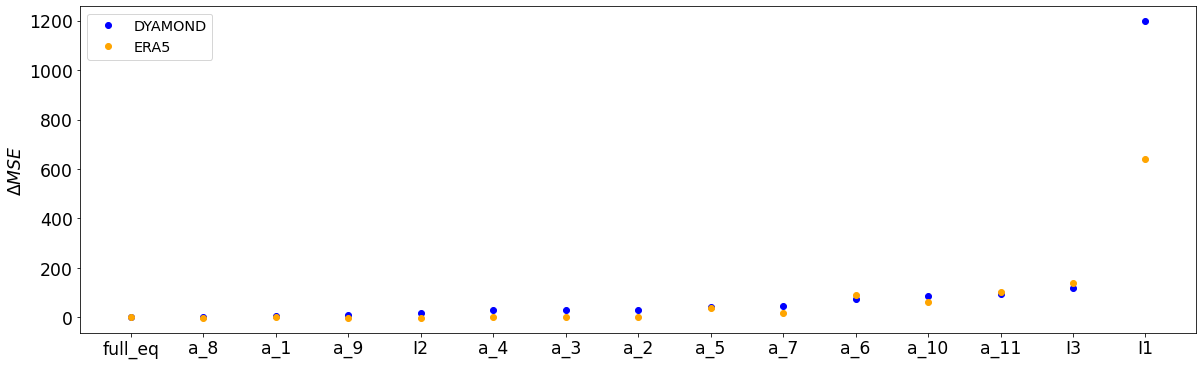

In [12]:
# Setting up the figure
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Ablation Study']

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(1,1,i+1)
    axis = axes[:i] + axes[(i+1):]
    
    YMAX = 600
    
    df_mean = df_restrained.mean().sort_values(ascending=True)
    df_sorted = df_restrained[df_mean.index]

    # sns.boxplot(data=df_sorted)
    
    # Switching to matplotlib because there's basically no variance
    # Subtracting full_eq so that the yaxis shows the delta in MSE
    plt.plot(df_sorted.mean() - df_sorted['full_eq'].mean(), 'bo')
    plt.plot(df_restrained_era5.mean() - df_restrained_era5['full_eq'].mean(), 'o', color='orange')
    plt.ylabel('$\Delta MSE$')
    
    plt.legend(['DYAMOND', 'ERA5'])

In [13]:
1 - 102.973674/106.391324

0.03212339006139253

In [14]:
df_sorted.mean()['I1']

1300.5257363856567

In [15]:
df_restrained_era5.mean()['I1']

762.8683611101507

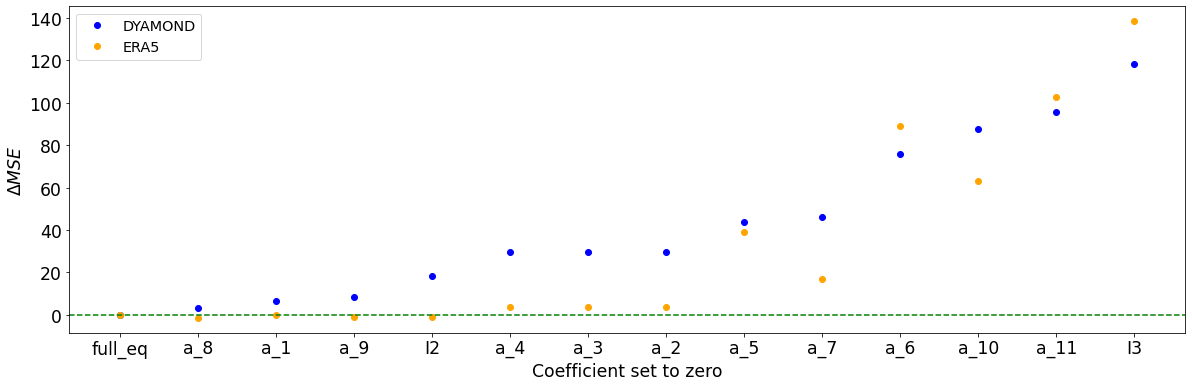

In [48]:
# Setting up the figure
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Ablation Study']

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(1,1,i+1)
    axis = axes[:i] + axes[(i+1):]
    
    YMAX = 600
                
    # plt.title(title_name)
    
    df_mean = df_restrained.mean().sort_values(ascending=True)
    df_sorted = df_restrained[df_mean.index]

    # sns.boxplot(data=df_sorted.iloc[:, :-1])
    
    # Switching to matplotlib because there's basically no variance
    # Subtracting full_eq so that the yaxis shows the delta in MSE
    plt.plot(df_sorted.drop(['I1'], axis=1).mean() - df_sorted['full_eq'].mean(), 'bo')
    plt.plot(df_restrained_era5.drop(['I1'], axis=1).mean() - df_restrained_era5['full_eq'].mean(), 'o', color='orange')
    plt.xlabel(r'Coefficient set to zero')
    plt.ylabel(r'$\Delta MSE$')
    
    plt.legend(['DYAMOND', 'ERA5'])
    plt.axhline(y=0, ls='--', color='green')
    # plt.savefig('dyamond_era5_ablation_study_results.pdf')

In [14]:
df_restrained_era5.drop(['I1'], axis=1).mean() - df_restrained_era5['full_eq'].mean()

a_8         -2.265682
a_4         -5.580418
full_eq      0.000000
a_10       -10.266322
a_1         -8.959015
I2         -10.039276
a_9          3.604393
A            8.984238
a_11        53.877799
a_12        90.199687
I3         123.390766
a_7          7.944651
a_2         -5.398501
a_5         30.085655
a_6         80.268101
a_3         -5.398501
dtype: float64

In [114]:
df_sorted.drop(['I1'], axis=1).mean() - df_sorted['full_eq'].mean()

full_eq      0.000000
a_8          3.417650
a_1          6.455206
a_9          8.545663
I2          18.376551
a_4         29.573352
a_3         29.573352
a_2         29.573352
a_5         43.624484
a_7         46.272034
a_6         75.670621
a_10        87.636364
a_11        95.753449
I3         118.502761
dtype: float64

In [115]:
df_restrained_era5.drop(['I1'], axis=1).mean() - df_restrained_era5['full_eq'].mean()

a_1          0.129698
I2          -1.161989
a_9         -1.216593
full_eq      0.000000
a_8         -1.337105
a_3          3.478786
a_10        63.334763
a_11       102.582786
a_4          3.478786
I3         138.534671
a_7         16.821939
a_6         89.145388
a_5         38.962943
a_2          3.478786
dtype: float64